<a href="https://colab.research.google.com/github/hany606/LCT_Spring20IU/blob/master/Lab12_IU_Hany_Hamed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Hany Hamed**

**Group: 6**


# Tasks
* Simulate a simple pendulum with known mass and length.
* Simulate a simple pendulum with mass and length changed by
a fixed value. Plot variation of φ. Also plot φ for item (1).
* Simulate the simple pendulum considering random input for
torque u. Estimate the system parameters.
* Determine the input torque which will help in identifying the
paramters with minimum error.


# Task 1


* We will put coordinates frame fixed on the object and we will analysis the weight of the object ($mg$) to the axis of the frame to ($mgsin(\theta) = mg\theta, mgcos(\theta)= mg)$ respectively to the axis where the first one is for the x-axis of the frame and the second one for the y-axis of the frame. Notice that as the angle is too small, $sin(\theta)$ is approximated to $\theta$ and $cos(\theta)$ to 1.

* Calculate the torques around the pivot point
  $\tau = I \alpha = \sum F$, $I = ml^2$.
  We will analysis the restoring forces of the springs, they have the same magnitude and the same direction due to having one spring compressed and wants to be stretched and the other one is stretched and wants to be compressed in order to return to the rest position of the springs.
  
  Springs restoring forces = $2kd$
  We will analysis the restoring force to x-axis and y-axis of the object $(2kdcos\theta , 2kdsin\theta) = (2kd, 2kd\theta)$ where $d = asin\theta$

  $\sum F = -mgl\theta - 2ka^2\theta$

* Construct the Model:

  $ml^2 \ddot \theta = -mgl\theta - 2ka^2\theta$

  $\ddot \theta + \frac{g}{l}\theta + \frac{2ka^2}{ml^2}\theta = 0$
  
  $\ddot \theta + 0 * \dot \theta + (\frac{g}{l} + \frac{2ka^2}{ml^2})\theta = \frac{1}{ml^2}F_{ext}$



  $x_1 = \theta \\ x_2 = \dot \theta \\ k = 0$


$$\begin{bmatrix} \dot x_1 \\ \dot x_2 \end{bmatrix} = 
\begin{bmatrix} 
0 & 1 \\
-\frac{g}{l} - \frac{2ka^2}{ml^2} & 0
\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}+
\begin{bmatrix}0 \\  \frac{1}{ml^2}\end{bmatrix} F(t)$$



![alt text](https://drive.google.com/uc?id=1IHmzVzhVBKkP_q2damcQomFqGlxCQprX)



Mass: 5, Spring Coefficient: 0, l_length (pendulem length): 3, a_length (spring affecting length): 0
Our coeffitients a are: [16.33333333  0.        ]
Matrix A:
[[ 0.          1.        ]
 [-3.26666667 -0.        ]]
[ 0.+1.80739223j -0.-1.80739223j]
Initial values
[0.95479098 0.08355284]


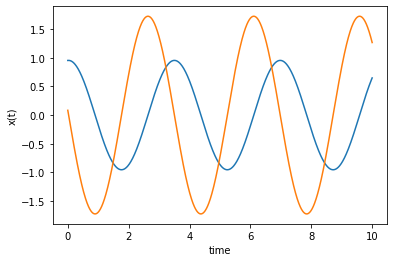

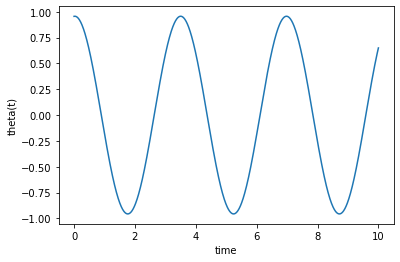

In [0]:
# 2nd part

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

l_length = 3
a_length = 0
k_spring = 0
mass = 5

# Precondition of the selection of the a_length and modify it if it is not fullfill the condition
a_length = a_length if a_length <= l_length else l_length/int(np.random.rand(1)[0]*10)

g = 9.8
print("Mass: {:}, Spring Coefficient: {:}, l_length (pendulem length): {:}, a_length (spring affecting length): {:}".format(mass, k_spring, l_length, a_length))

a = np.array([(mass*g)/l_length + 2*k_spring*(a_length**2)/(l_length**2), 0])
print("Our coeffitients a are:", a)

a_norm = a[:] / mass     # divide by "ak"

A = np.zeros((2, 2))  # state matrix
A[0, 1] = 1
A[1, :] = -a_norm
B = np.array([0, 1/(mass*(l_length**2))])


print("Matrix A:")
print(A)
print(np.linalg.eig(A)[0])



def functionF(t):
  return 0

# x_dot from state space
def StateSpace(x, t):
    u = functionF(t)
    return A.dot(x) + B.dot(u)

time = np.linspace(0, 10, 1000)   
x0 = np.random.rand(2)  # initial state
print("Initial values")
print(x0)

solution = odeint(StateSpace, x0, time)


theta = [i[0] for i in solution]
# state space based model
plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()

plt.plot(time, theta)
plt.xlabel('time')
plt.ylabel('theta(t)')

plt.show()

# Task2


With changing of mass the theta will not change or the system is affected by the changing of mass as it is totally independent of it, however, with changing of length, the system changes (A matrix changes)

Mass: 5, Spring Coefficient: 0, l_length (pendulem length): 3, a_length (spring affecting length): 0
Our coeffitients a are: [16.33333333  0.        ]
Matrix A:
[[ 0.          1.        ]
 [-3.26666667 -0.        ]]
[ 0.+1.80739223j -0.-1.80739223j]
Initial values
[0.88766211 0.756462  ]


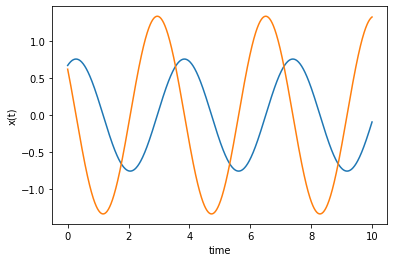

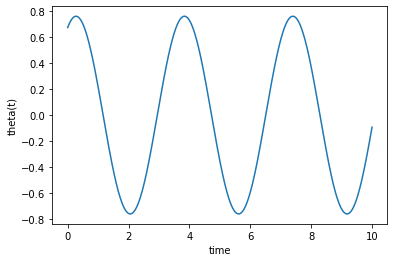

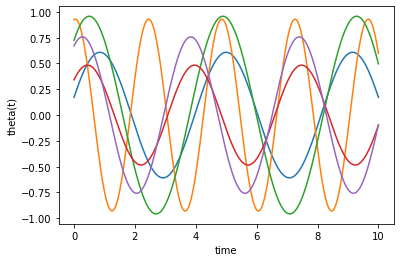

In [0]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

l_length = 3
a_length = 0
k_spring = 0
mass = 5
num_trials = 5
max_length = 5

# Precondition of the selection of the a_length and modify it if it is not fullfill the condition
a_length = a_length if a_length <= l_length else l_length/int(np.random.rand(1)[0]*10)

g = 9.8
print("Mass: {:}, Spring Coefficient: {:}, l_length (pendulem length): {:}, a_length (spring affecting length): {:}".format(mass, k_spring, l_length, a_length))

a = np.array([(mass*g)/l_length + 2*k_spring*(a_length**2)/(l_length**2), 0])
print("Our coeffitients a are:", a)

a_norm = a[:] / mass     # divide by "ak"

A = np.zeros((2, 2))  # state matrix
A[0, 1] = 1
A[1, :] = -a_norm
B = np.array([0, 1/(mass*(l_length**2))])


print("Matrix A:")
print(A)
print(np.linalg.eig(A)[0])



def functionF(t):
  return 0

# x_dot from state space
def StateSpace(x, t):
    u = functionF(t)
    return A.dot(x) + B.dot(u)

time = np.linspace(0, 10, 1000)   
x0 = np.random.rand(2)  # initial state
print("Initial values")
print(x0)

solution = odeint(StateSpace, x0, time)

thetas = []

for i in range(num_trials):
  l_local_length = np.random.rand(1)*max_length
  a = np.array([(mass*g)/l_local_length, 0])

  a_norm = a[:] / mass     # divide by "ak"

  A = np.zeros((2, 2))  # state matrix
  A[0, 1] = 1
  A[1, :] = -a_norm
  x0 = np.random.rand(2)  # initial state
  solution = odeint(StateSpace, x0, time)
  theta_loc = [i[0] for i in solution]
  thetas.append(theta_loc)

theta = [i[0] for i in solution]
# state space based model
plt.plot(time, solution)
plt.xlabel('time')
plt.ylabel('x(t)')

plt.show()

plt.plot(time, theta)
plt.xlabel('time')
plt.ylabel('theta(t)')

plt.show()
for i in range(num_trials):
  plt.plot(time, thetas[i])
  plt.xlabel('time')
  plt.ylabel('theta(t)')

plt.show()

# Task 3 & 4



In notion of $y = u = \textbf{M} * \textbf{$\theta$}$

$$y = u = 
\begin{bmatrix} 
\ddot \theta & \dot \theta  & \theta\\
\end{bmatrix}
\begin{bmatrix} 
ml^2 \\ mgl  \\ 0
\end{bmatrix} $$



In [0]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

l_length = 3
a_length = 0
k_spring = 0
mass = 5
num_trials = 500
max_length = 5
max_force = 5

# Precondition of the selection of the a_length and modify it if it is not fullfill the condition
a_length = a_length if a_length <= l_length else l_length/int(np.random.rand(1)[0]*10)

g = 9.8
print("Mass: {:}, Spring Coefficient: {:}, l_length (pendulem length): {:}, a_length (spring affecting length): {:}".format(mass, k_spring, l_length, a_length))

a = np.array([(mass*g)/l_length + 2*k_spring*(a_length**2)/(l_length**2), 0])
print("Our coeffitients a are:", a)

a_norm = a[:] / mass     # divide by "ak"

A = np.zeros((2, 2))  # state matrix
A[0, 1] = 1
A[1, :] = -a_norm
B = np.array([0, 1/(mass*(l_length**2))])


print("Matrix A:")
print(A)


def theta_mat_calc(y_bar, M_bar):
  M_bar = np.array(M_bar)
  y_bar = np.array(y_bar)
  theta_mat = ((np.linalg.inv((M_bar.T).dot(M_bar))).dot(M_bar.T)).dot(y_bar)
  return theta_mat



def functionF():
  return np.random.rand(1)*max_force



y_bar = []
M_bar = []
# x_dot from state space
def StateSpace(x, t):
    u = functionF()
    y_bar.append(u)
    sys = (A.dot(x) + B*u)
    theta_ddot = sys[1]
    M_bar.append([x[0], x[1], theta_ddot])
    return sys

time = np.linspace(0, 10, 1000)   
x0 = np.random.rand(2)  # initial state

solution = odeint(StateSpace, x0, time)


theta_mat = theta_mat_calc(y_bar, M_bar)
print("Best estimation for the values of the parameters of the system")
print(theta_mat)

print("Real value for the parameters of the system")
real_param = [[mass*g*l_length],0,[mass*(l_length**2)]]
print(real_param)

error = []
for i in range(3):
  error.append(real_param[i]-theta_mat[i])
print("Error:\n", error)

Mass: 5, Spring Coefficient: 0, l_length (pendulem length): 3, a_length (spring affecting length): 0
Our coeffitients a are: [16.33333333  0.        ]
Matrix A:
[[ 0.          1.        ]
 [-3.26666667 -0.        ]]
Best estimation for the values of the parameters of the system
[[1.47000000e+02]
 [1.67556941e-14]
 [4.50000000e+01]]
Real value for the parameters of the system
[[147.0], 0, [45]]
Error:
 [array([1.13686838e-12]), array([-1.67556941e-14]), array([3.26849658e-13])]


/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
